#   [Py4Hw User Guide](../UserGuide.ipynb)> 1.2 Object Oriented Approach
###  [Next: 1.3 HWSystem](HWSystem.ipynb)

Py4hw follows an Object Oriented (OO) Approach, we extensively use Encapsulation, Inheritance and Polymorphism.
Some [old-school] Hardware designers would not feel confortable with OO.
My message for them would be: ***get used to it ASAP, your current HDL is either going OO or dying***.

Objects can contain other objects. We use that to define the hierarchy of circuits.
Moreover, in Python, collections of objects can be defined in several ways.
We commonly use Python lists and directories.

Modern OO languages (such as Python) let you define classes, that combine data and behaviour (functions).
Both can be inherited from ancestor (called base) classes.
In our case all circuits must be based on the Logic class.

Below you have an example of a class, that we will use to show to dynamic manipulation features of py4hw and its OO nature.

In [1]:
import py4hw

In [2]:
class Example(py4hw.Logic):
    
    def __init__(self, parent, name):
        super().__init__(parent, name)
        
        # Do whatever you need here
        # for instance, now we are going to create a number of outputs
        for i in range(10):
            self.addOut('out{}'.format(i), None)

Contrary to many other HDL languages, in py4hw, hardware circuits do not have an explicit (static) interface. The interface is created during runtime as needed by the generator code.
This allows to do complex things that would be impossible otherwise.

The previously defined circuit only contains 10 outputs, and instantiate no logic gate.

Moreover, the outputs are unconnected. Seems a crazy useless design so far.

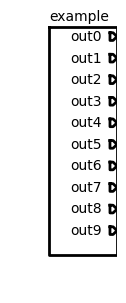

In [3]:
sys = py4hw.HWSystem()
example = Example(sys, 'example')
#py4hw.debug.printHierarchy(example)
sch = py4hw.Schematic(sys)
sch.draw()

But is is used to illustrate the power of **py4hw** to do complex behaviour like circuit modification and manipulation dynamically.
Imagine that you now need an input to the previous circuit.

We can also try to connect the outputs to some newly created wires.
We will use a Python enumeration to traverse the output ports of the example circuit and add the missing wires accordingly.

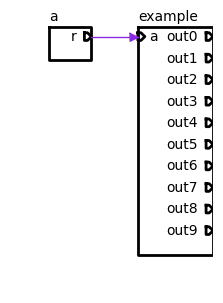

In [4]:
a = sys.wire('a', 10)
py4hw.Constant(sys, 'a', 0xff, a)
example.addIn('a', a)

for idx, p in enumerate(example.outPorts):
    p.wire = sys.wire('out{}'.format(idx)) 

sch = py4hw.Schematic(sys)
sch.draw()

Now you want to implement the circuit by instantiating some gates.
Again, we will use Python ability to easily create lists dynamically to get all the wire objects from the output ports.

By the way, in py4hw you cannot access a specific bit from wire. You always have to use a circuit to extract that bit or group of bits. You can use BitsLSBF, BitsMSBF, Bit, or Range for this.

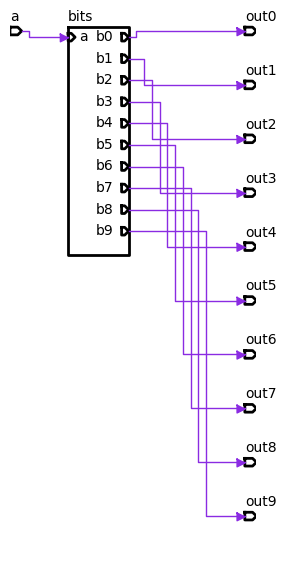

In [5]:
py4hw.BitsLSBF(example, 'bits', a, [x.wire for x in example.outPorts])

sch = py4hw.Schematic(example)
sch.draw()

Let's look at some of the fields of the example circuit object.
It contains an instance of the BitsLSBF circuit, and input and output ports.

You might be puzzled to see that the circuit does not have internal wires.
Actually the wires used by the ports were created by the parent, in this case the HWSystem, which has no ports.

In [6]:
print('For example circuit')
print('Child instances:', example.children)
print('Internal wires:', example._wires)
print('Input Ports:', example.inPorts)
print('Output Ports:', example.outPorts)

print()
print('For HWSystem circuit')
print('Child instances:', sys.children)
print('Internal wires:', sys._wires)
print('Input Ports:', sys.inPorts)
print('Output Ports:', sys.outPorts)


For example circuit
Child instances: {'bits': <py4hw.logic.bitwise.BitsLSBF object at 0x000002394677C5E0>}
Internal wires: {}
Input Ports: [<py4hw.base.InPort object at 0x0000023946EDA890>]
Output Ports: [<py4hw.base.OutPort object at 0x000002394672BD30>, <py4hw.base.OutPort object at 0x000002394677C940>, <py4hw.base.OutPort object at 0x000002394677C8E0>, <py4hw.base.OutPort object at 0x000002394677C1F0>, <py4hw.base.OutPort object at 0x000002394677C250>, <py4hw.base.OutPort object at 0x000002394677C2B0>, <py4hw.base.OutPort object at 0x000002394677C430>, <py4hw.base.OutPort object at 0x000002394677C490>, <py4hw.base.OutPort object at 0x000002394677C4F0>, <py4hw.base.OutPort object at 0x000002394677C550>]

For HWSystem circuit
Child instances: {'example': <__main__.Example object at 0x000002394672BC40>, 'a': <py4hw.logic.bitwise.Constant object at 0x000002394677EE00>}
Internal wires: {'clk50': <py4hw.base.Wire object at 0x000002394435B7F0>, 'a': <py4hw.base.Wire object at 0x00000239467